In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn import tree
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('churn_data.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
dataset = dataset.drop(columns=["RowNumber", "CustomerId", "Surname"])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [6]:
dataset.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  73
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

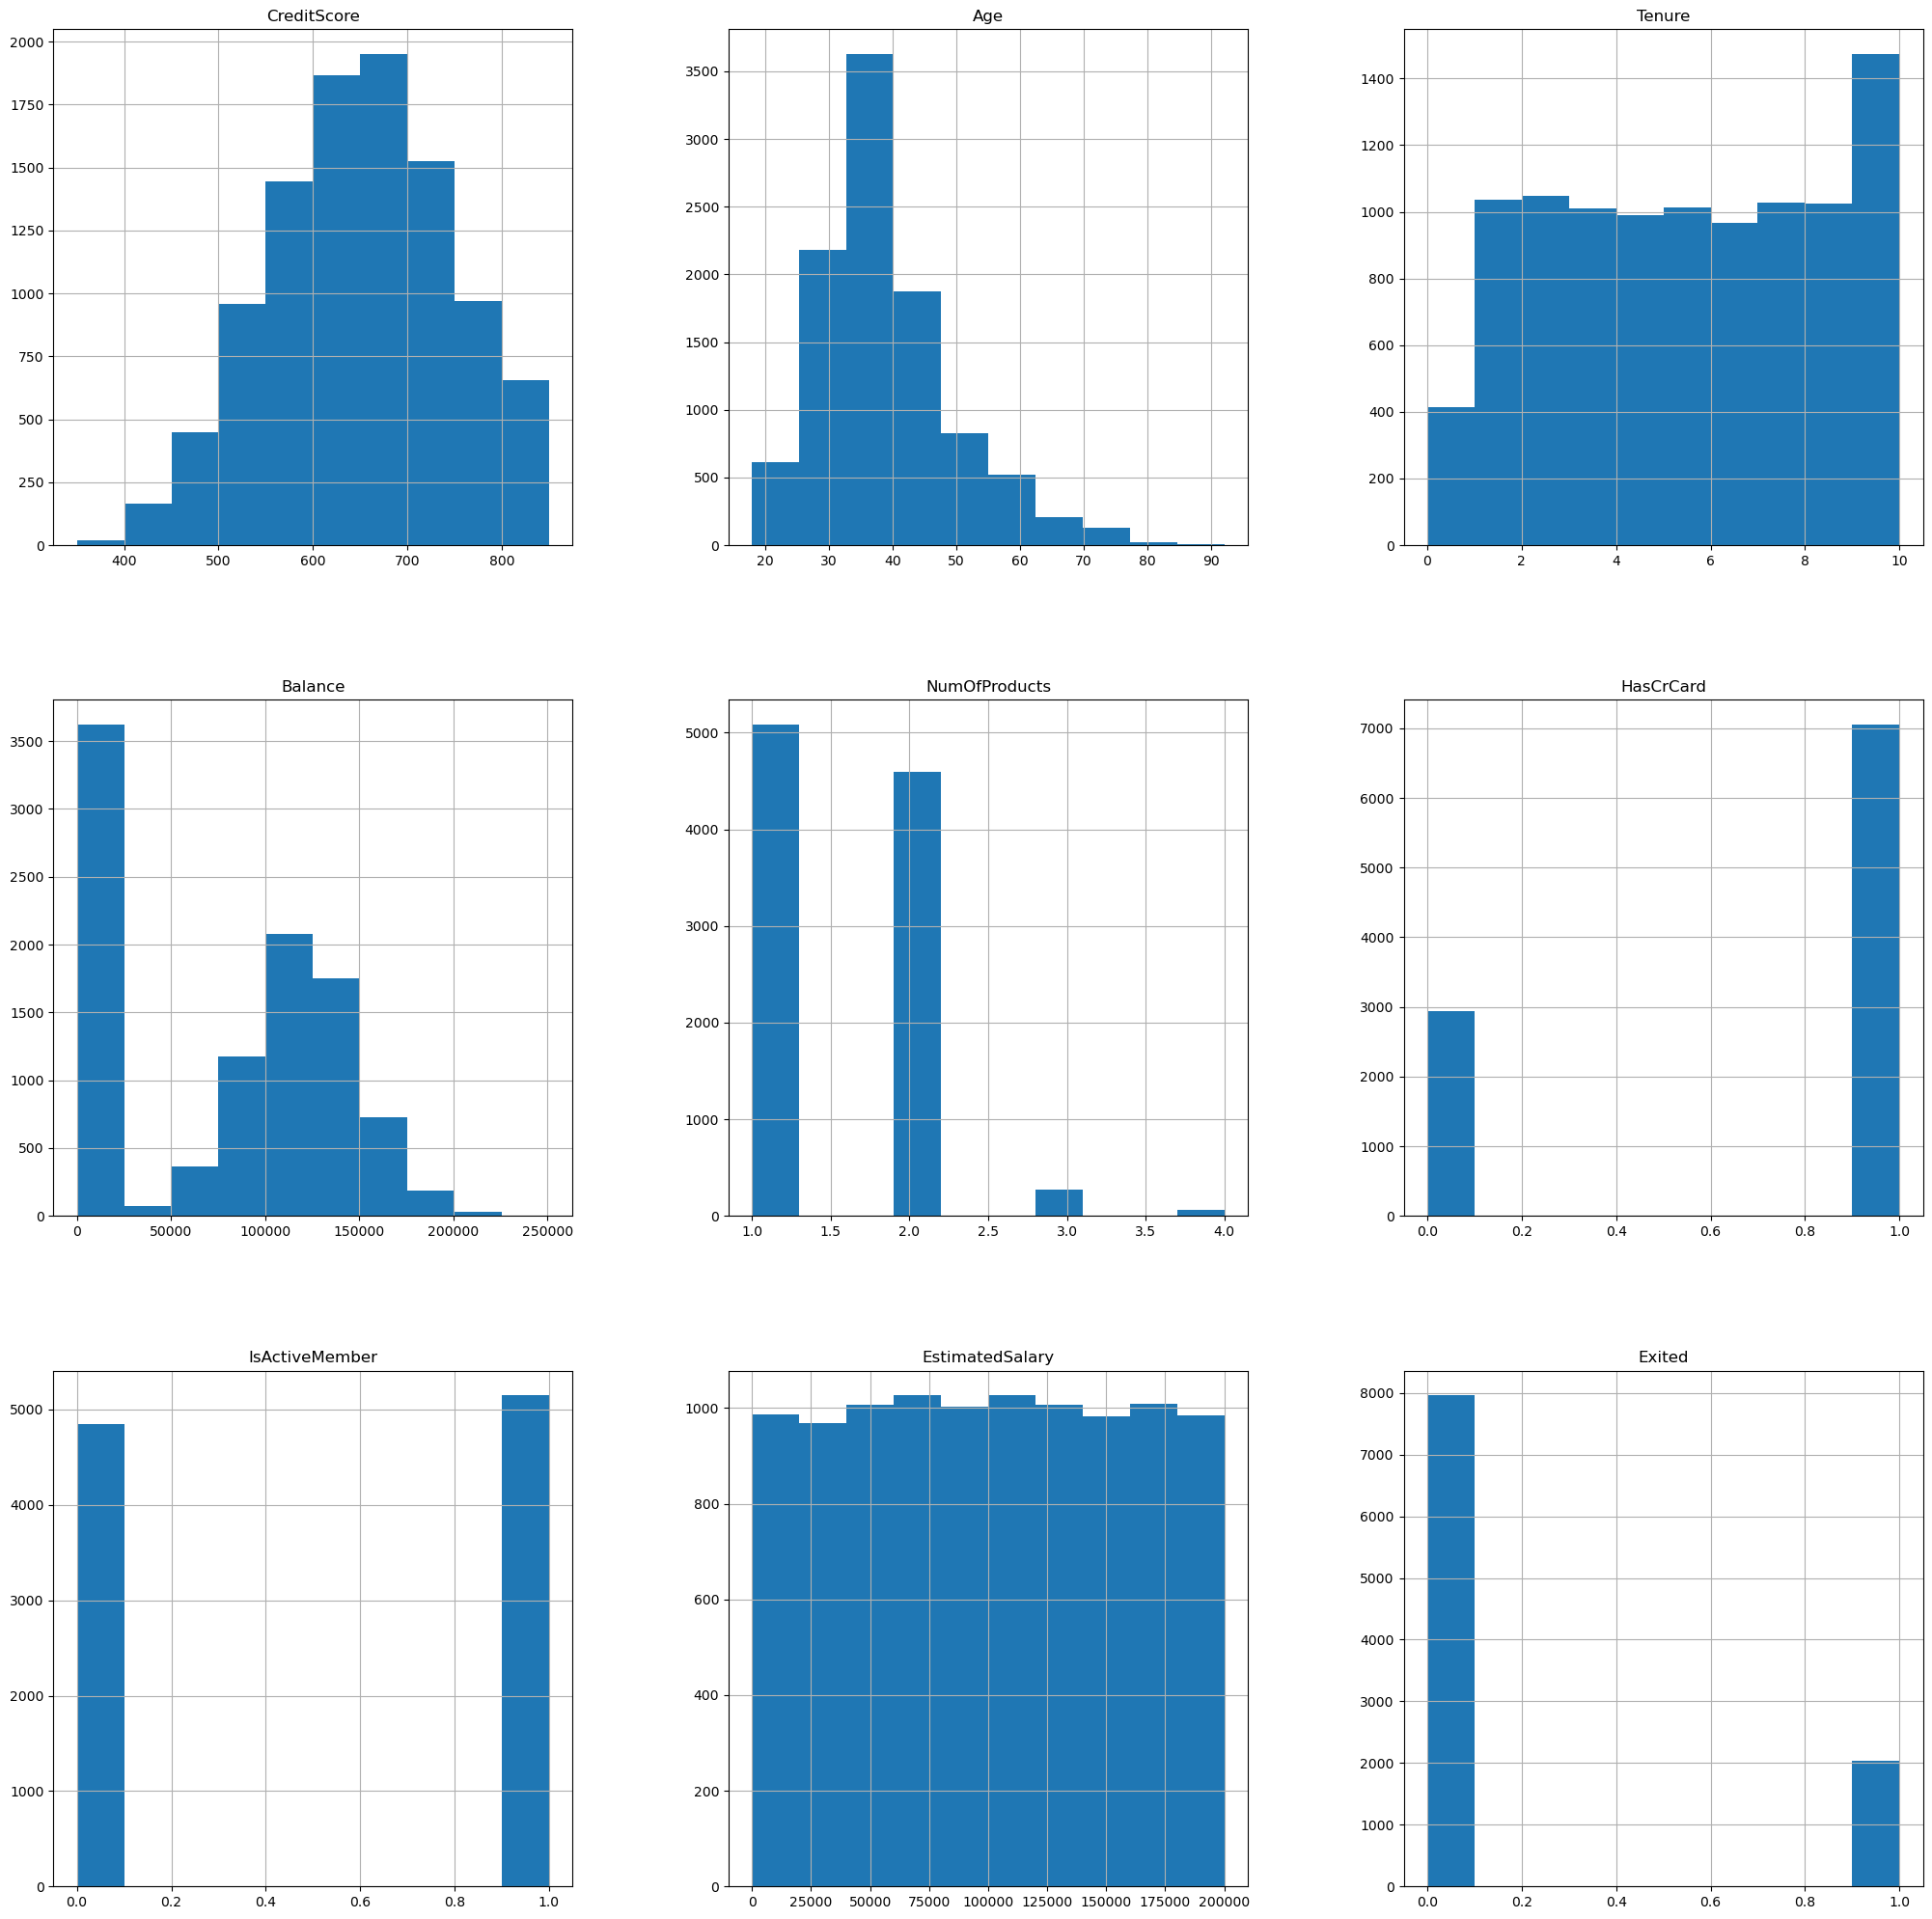

In [7]:
dataset.hist(figsize = (25,25))

U zasebnom datasetu dataset_scale cuvacemo skalirane podatke

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data_standard = scaler.fit_transform(dataset)

# Create DataFrame from scaled data
dataset_scaled = pd.DataFrame(data=scaled_data_standard, columns=dataset.columns)

dataset_scaled

ValueError: could not convert string to float: 'France'

In [ ]:
dataset.count()

CreditScore        10002
Geography          10001
Gender             10002
Age                10001
Tenure             10002
Balance            10002
NumOfProducts      10002
HasCrCard          10001
IsActiveMember     10001
EstimatedSalary    10002
Exited             10002
dtype: int64

In [ ]:
dataset.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.dropna(axis='rows', inplace=True)

In [ ]:
dataset.count()

CreditScore        9998
Geography          9998
Gender             9998
Age                9998
Tenure             9998
Balance            9998
NumOfProducts      9998
HasCrCard          9998
IsActiveMember     9998
EstimatedSalary    9998
Exited             9998
dtype: int64

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

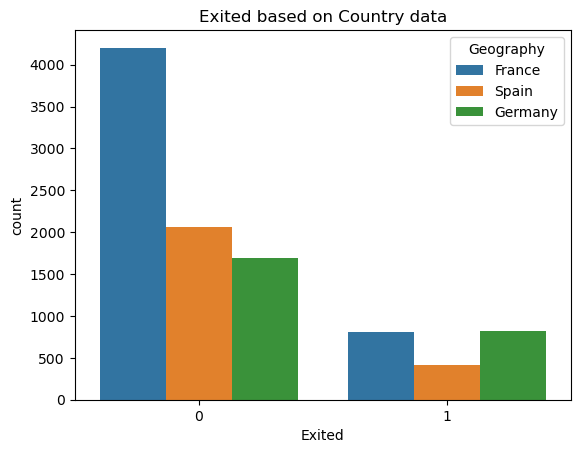

In [ ]:
sn.countplot(
    x="Exited", hue="Geography", data=dataset
)
plt.title("Exited based on Country data")
plt.show()

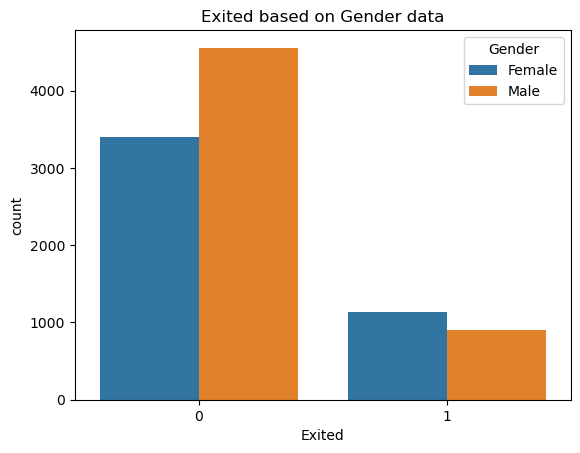

In [ ]:
sn.countplot(
    x="Exited", hue="Gender", data=dataset
)
plt.title("Exited based on Gender data")
plt.show()

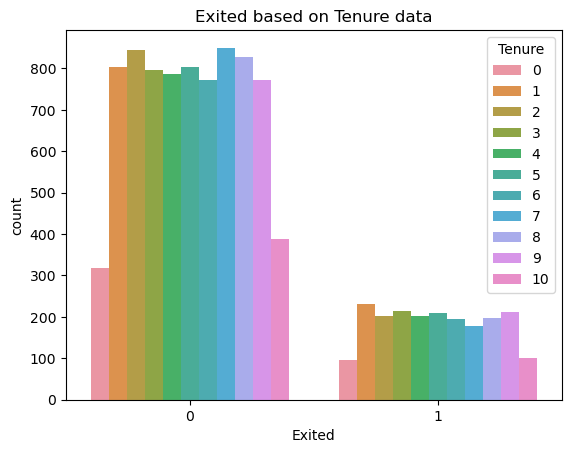

In [ ]:
sn.countplot(
    x="Exited", hue="Tenure", data=dataset
)
plt.title("Exited based on Tenure data")
plt.show()

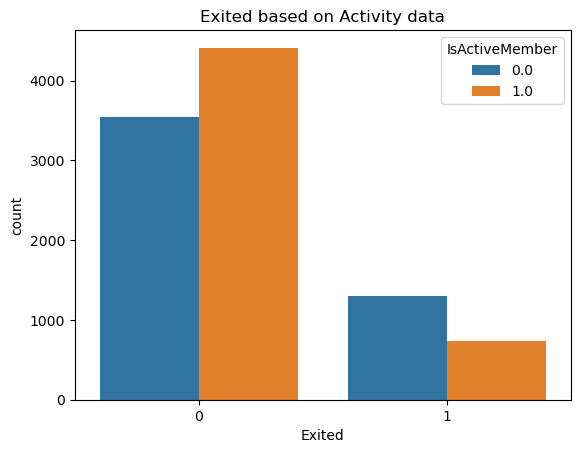

In [ ]:
sn.countplot(
    x="Exited", hue="IsActiveMember", data=dataset
)
plt.title("Exited based on Activity data")
plt.show()

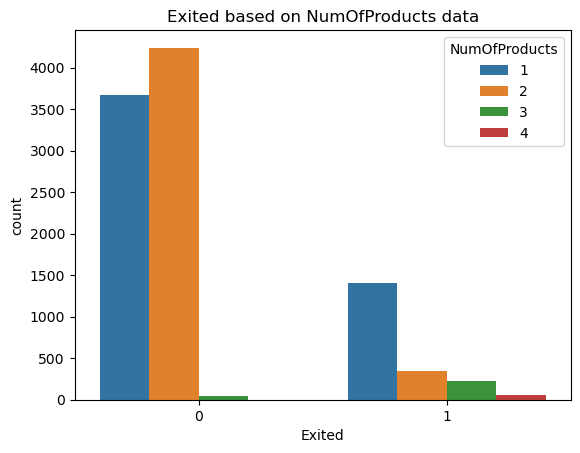

In [ ]:
sn.countplot(
    x="Exited", hue="NumOfProducts", data=dataset
)
plt.title("Exited based on NumOfProducts data")
plt.show()

In [ ]:
dataset.loc[dataset["NumOfProducts"] == 4]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
70,738,Germany,Male,58.0,2,133745.44,4,1.0,0.0,28373.86,1
1254,628,France,Female,46.0,1,46870.43,4,1.0,0.0,31272.14,1
1469,819,Germany,Female,49.0,1,120656.86,4,0.0,0.0,166164.30,1
1488,596,Spain,Male,30.0,6,121345.88,4,1.0,0.0,41921.75,1
1701,792,France,Male,50.0,9,0.00,4,1.0,1.0,194700.81,1
1876,640,Germany,Male,39.0,9,131607.28,4,0.0,1.0,6981.43,1
2124,704,France,Male,32.0,7,127785.17,4,0.0,0.0,184464.70,1
2196,773,Germany,Male,47.0,2,118079.47,4,1.0,1.0,143007.49,1
2285,630,Germany,Male,50.0,3,129370.91,4,1.0,1.0,47775.34,1


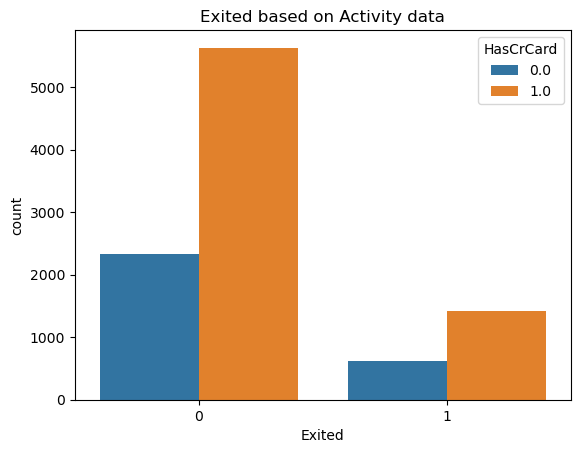

In [ ]:
sn.countplot(
    x="Exited", hue="HasCrCard", data=dataset
)
plt.title("Exited based on Activity data")
plt.show()

Nakon vizuelizacije podataka zakljucujemo: 
* najveci broj korisnika iz Francuske
* zemlja porekla ne utice u znacajnoj meri na odliv klijenata, svakako veci rizik predstavljaju klijenti iz Nemacke i Spanije
* pol ne utice znacajno na odliv klijenata, veci rizik od napustanja banke ako je klijent zenskog pola
* godine saradnje ne uticu znacajno, najmanji rizik za korisnike koji su klijenti manje od jedne ili vise od 9 godina
* veci odliv neaktivnih korisnika
* 4 proizvoda banke koristili su samo klijenti koji su prekinuli saradnju, cak 60 takvih slucajeva

Enkodiranje kategorickih vrednosti

In [ ]:
label_enc = LabelEncoder()

dataset["Geography"] = label_enc.fit_transform(dataset[["Geography"]])
dataset["Gender"] = label_enc.fit_transform(dataset[["Gender"]])

dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [ ]:
dataset.shape

(9998, 11)

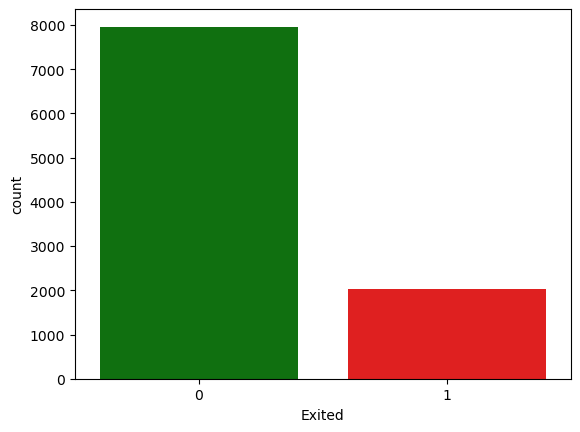

In [ ]:
sn.countplot(
    x="Exited", data=dataset, palette=("green", "red")
)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   int32  
 2   Gender           9998 non-null   int32  
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 859.2 KB


In [ ]:
dataset.describe(include='all',)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,0.746349,0.545609,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,96.633003,0.827454,0.497940,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


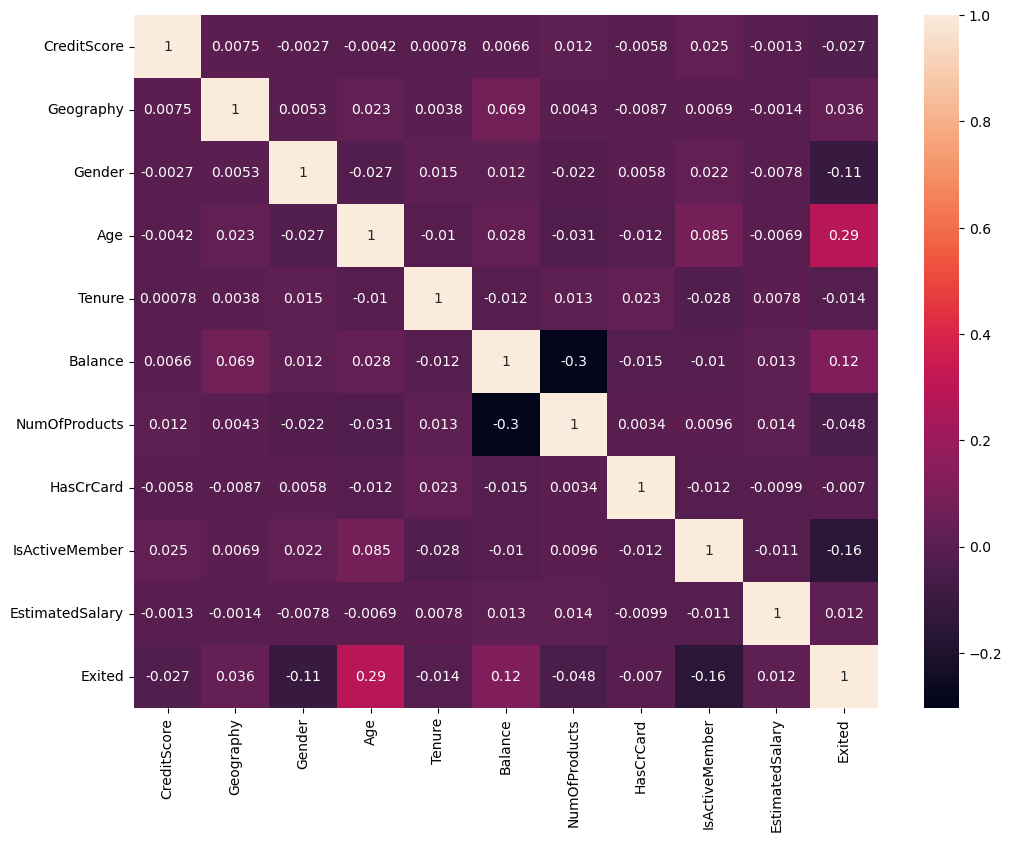

In [ ]:
corr = dataset.corr()
plt.subplots(figsize=(12, 9))
sn.heatmap(corr, annot=True)
plt.show()

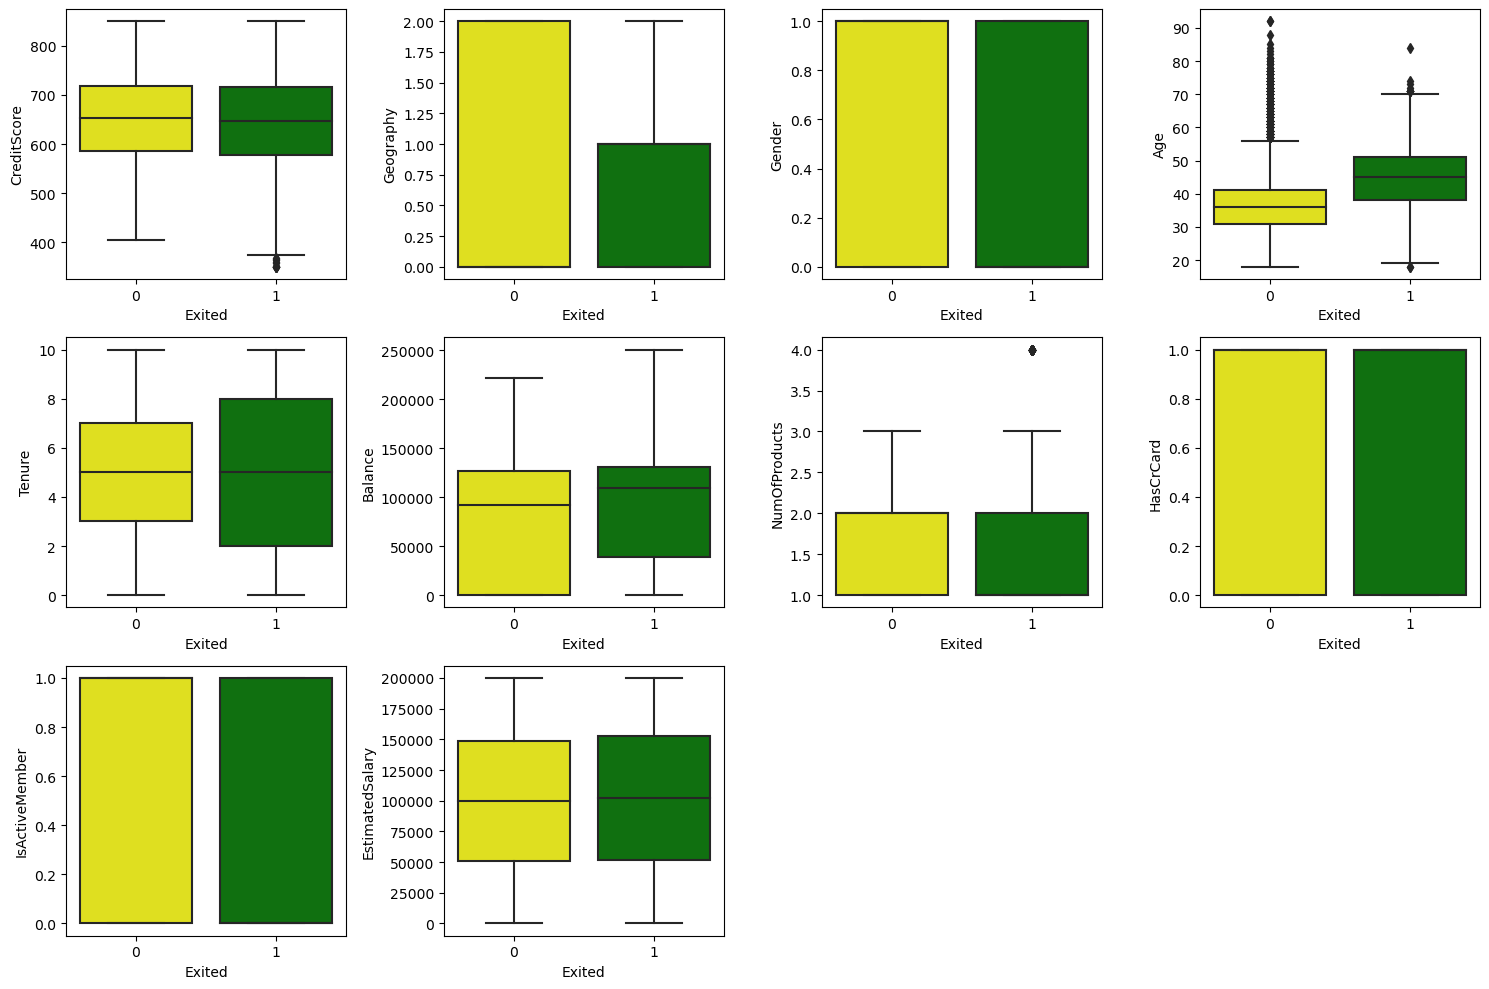

In [ ]:
plt.figure(figsize=(15, 10))

num_cols = len(dataset.columns[:-1])
num_rows = (num_cols + 3) // 4  # Calculate number of rows dynamically

for i, column in enumerate(dataset.columns[:-1]):
    plt.subplot(num_rows, min(4, num_cols), i+1)  # Adjusting the number of columns per row
    sn.boxplot(x=dataset["Exited"], y=dataset[column], palette=("yellow", "green"))
    plt.tight_layout()

plt.show()

Pokusano izbacivanje outlier-a, algoritam je izbacio sve recorde vezane za korisnike koji su napustili banku

In [ ]:
dataset_discretized = dataset.copy()

In [ ]:
dataset_discretized

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
def discretize_salary(salary):
    if salary <= 0:
        return 0
    elif salary < 100000:
        return 1
    elif salary < 200000:
        return 2
    else:
        return 3

In [ ]:
def discretize_balance(balance_cat):
    if balance_cat == 0:
        return 0
    else:
        return 1

In [ ]:
def discretize_age(age):
    if age < 30:
        return 0
    elif age < 40:
        return 1
    elif age < 60:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

In [ ]:
dataset_discretized['EstimatedSalary'] = dataset_discretized['EstimatedSalary'].apply(discretize_salary)
dataset_discretized['Balance'] = dataset_discretized['Balance'].apply(lambda x: discretize_balance(x))
dataset_discretized['Age'] = dataset_discretized['Age'].apply(discretize_age)

dataset_discretized

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,2,2,0,1,1.0,1.0,1,1
1,608,2,0,2,1,1,1,0.0,1.0,1,0
2,502,0,0,2,8,1,3,1.0,0.0,1,1
3,699,0,0,1,1,0,2,0.0,0.0,1,0
5,645,2,1,2,8,1,2,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,1,7,0,1,0.0,1.0,1,1
9998,772,1,1,2,3,1,2,1.0,0.0,1,1
9999,772,1,1,2,3,1,2,1.0,0.0,1,1
10000,792,0,0,0,4,1,1,1.0,0.0,1,0


Dalju analizu radicemo sa 3 dataseta:
* originalnim datasetom
* datasetom koji je skaliran StandardScalerom
* datasetom nad kojim je primenjena svojevrsna diskretizacija 

# Odredjivanje broja klastera

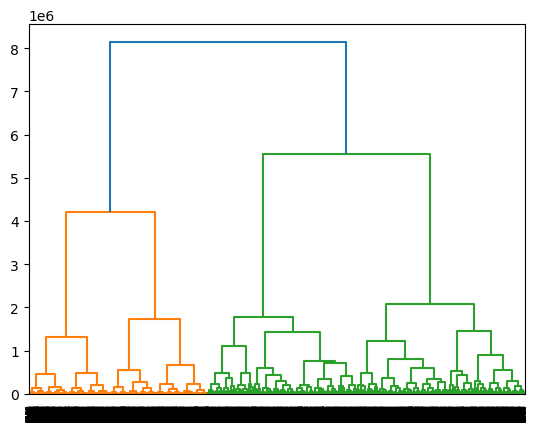

In [ ]:

linked = linkage(dataset, 'ward')

dendrogram(linked, orientation='top', show_leaf_counts=False)
plt.show()

Analizom dendrograma uocavamo 4 klastera

Elbow metodom takodje zakljucujemo da je najoptimalniji broj klastera 4

Text(0.5, 1.0, 'Elbow method')

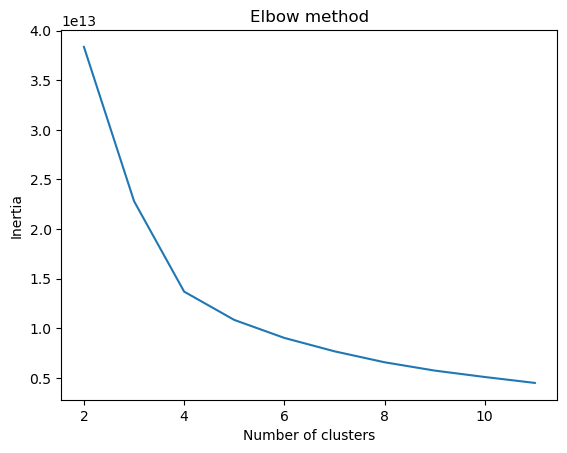

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

scores = [KMeans(n_clusters=i+2).fit(dataset).inertia_ 
          for i in range(10)]
sns.lineplot(x=np.arange(2, 12), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Elbow method")

Kako silhouette score treba biti sto veci, zakljucujemo da se najbolja vrednost dobija za 4 klastera

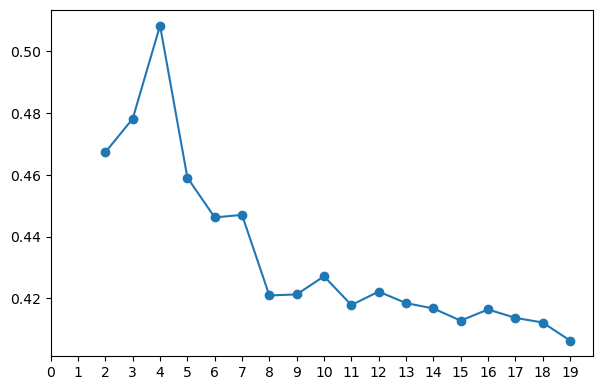

In [ ]:
from sklearn.metrics import silhouette_score

N=20
sil=[]

for i in range(2,N):    # Warning! error for n_clusters=i=1
  clusterer = KMeans(n_clusters=i).fit(dataset)
  cluster_labels = clusterer.labels_
  silhouette_avg = silhouette_score(dataset, cluster_labels)
  sil.append(silhouette_avg)

ax = plt.figure(figsize=(7,4.5)).gca()
ax.plot(range(2,N),sil, "-o")
ax.set_xticks(range(0,N,1))
plt.show()

Zakljucak: dalju analizu radimo za 4 klastera

# K-MEANS

In [ ]:
def calculate_clustering_metrics(title, labels, dataset = dataset):
    print(title)

    print("Silhouette score: ", silhouette_score(dataset, labels))
    print("Davies-Bouldin: ", davies_bouldin_score(dataset, labels))

In [ ]:
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

In [ ]:
def visualize_2d(dataset, labels) :
    pca_2d = prepare_pca(2, dataset, labels)
    sns.scatterplot(x=pca_2d.x, y=pca_2d.y, hue=pca_2d.labels, 
                palette="viridis")

In [ ]:
def visualize_3d(dataset, labels) :
    pca_3d = prepare_pca(3, dataset, labels)

    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection = '3d')
    cmaps = ['green', 'purple', 'red', 'orange']

    for i in range(4):
        ax.scatter3D(pca_3d["x"][labels==i], pca_3d["y"][labels ==i], pca_3d["z"][labels ==i], c=cmaps[i])

In [ ]:
def perform_kmeans_clustering(dataset):
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(dataset)

    clusters, counts = np.unique(kmeans.labels_, return_counts=True)
    print(clusters)
    print(counts)

    return kmeans.labels_

In [ ]:
kmeans_labels_normal = perform_kmeans_clustering(dataset)

[0 1 2 3]
[3129 1892 3065 1912]


In [ ]:
calculate_clustering_metrics("K-Means standard", kmeans_labels_normal)

K-Means standard


Silhouette score:  0.5083241645210846
Davies-Bouldin:  0.6422352374871876


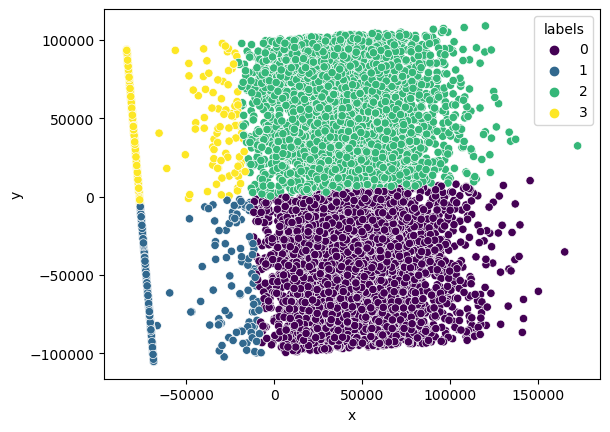

In [ ]:
visualize_2d(dataset, kmeans_labels_normal)

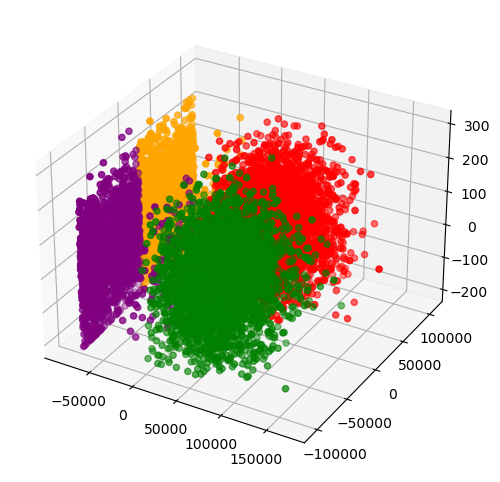

In [ ]:
visualize_3d(dataset, kmeans_labels_normal)

In [ ]:
kmeans_labels_scaled = perform_kmeans_clustering(dataset_scaled)

[0 1 2 3]
[2334 3251 2398 2015]


In [ ]:
calculate_clustering_metrics("KMeans Scaled", kmeans_labels_scaled, dataset_scaled )

KMeans Scaled
Silhouette score:  0.10463105829351124
Davies-Bouldin:  2.4336146606186375


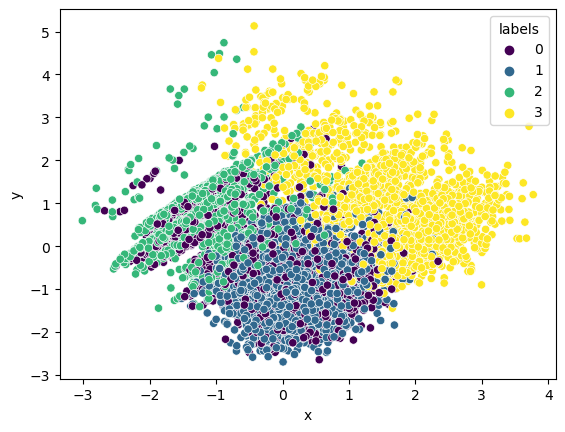

In [ ]:
visualize_2d(dataset_scaled, kmeans_labels_scaled)

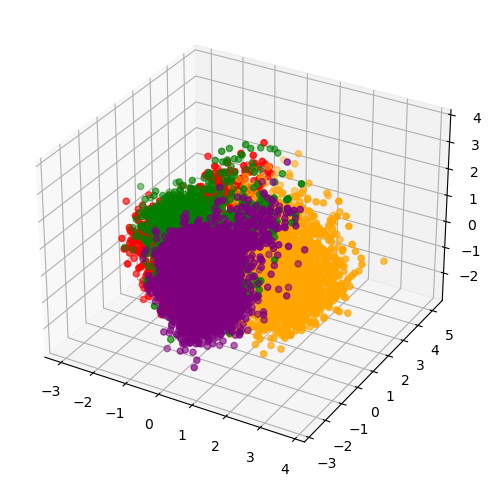

In [ ]:
visualize_3d(dataset_scaled, kmeans_labels_scaled)

In [ ]:
kmeans_labels_discretized = perform_kmeans_clustering(dataset_discretized)

[0 1 2 3]
[1856 3181 3178 1783]


In [ ]:
calculate_clustering_metrics("KMeans Discretized" , kmeans_labels_discretized, dataset_discretized)

KMeans Discretized


Silhouette score:  0.5264285387421315
Davies-Bouldin:  0.545170238660608


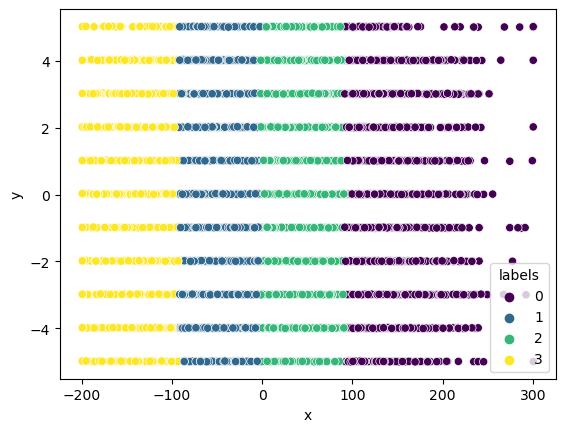

In [ ]:
visualize_2d(dataset_discretized, kmeans_labels_discretized)

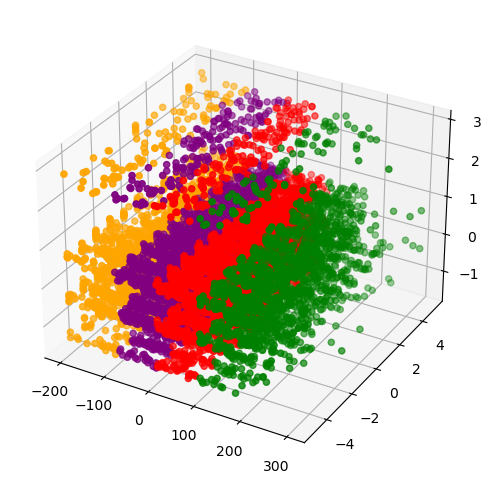

In [ ]:
visualize_3d(dataset_discretized, kmeans_labels_discretized)

# Agglomerative

In [ ]:
def perform_agglomerative_clustering(dataset) :

    agglomerative_model = AgglomerativeClustering(n_clusters=4)
    agglomerative_model.fit(dataset)
    print("Agglomerative Clustering:")

    clusters, counts = np.unique(agglomerative_model.labels_, return_counts=True)
    print(clusters)
    print(counts)

    return  agglomerative_model.labels_

In [ ]:
agglomerative_labels_normal = perform_agglomerative_clustering(dataset)


Agglomerative Clustering:
[0 1 2 3]
[3360 1980 3017 1641]


In [ ]:
calculate_clustering_metrics("Agglomerative normal", agglomerative_labels_normal, dataset)

Agglomerative normal
Silhouette score:  0.49618328625956126
Davies-Bouldin:  0.6495967356588626


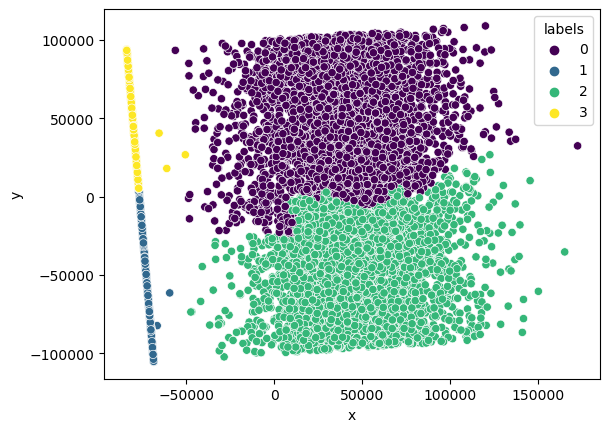

In [ ]:
visualize_2d(dataset, agglomerative_labels_normal)

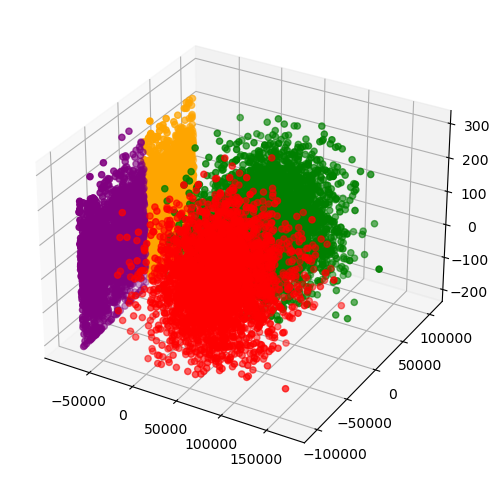

In [ ]:
visualize_3d(dataset, agglomerative_labels_normal)

In [ ]:
agglomerative_labels_scaled = perform_agglomerative_clustering(dataset_scaled)

Agglomerative Clustering:
[0 1 2 3]
[3700 2378 1882 2038]


In [ ]:
calculate_clustering_metrics("Agglomerative scaled", agglomerative_labels_scaled, dataset_scaled)

Agglomerative scaled
Silhouette score:  0.09304855416406038
Davies-Bouldin:  2.637006817474476


In [ ]:
agglomerative_labels_discretized = perform_agglomerative_clustering(dataset_discretized)

Agglomerative Clustering:
[0 1 2 3]
[2093 2350 3711 1844]


In [ ]:
calculate_clustering_metrics("Agglomerative discretized", agglomerative_labels_discretized, dataset_discretized)

Agglomerative discretized
Silhouette score:  0.46322908477611163
Davies-Bouldin:  0.5629003563978583


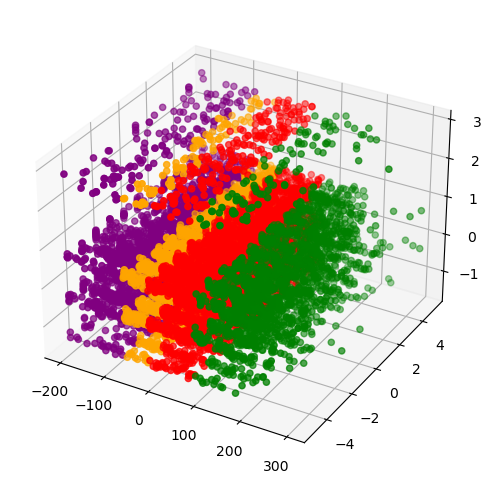

In [ ]:
visualize_3d(dataset_discretized, agglomerative_labels_discretized)

# GMM

In [ ]:
from sklearn.mixture import GaussianMixture

def perform_gmm_clustering(dataset) :

    gmm_model = GaussianMixture(n_components=4, random_state=7)
    gmm_model.fit(dataset)
    gmm_labels = gmm_model.predict(dataset)

    clusters, counts = np.unique(gmm_labels, return_counts=True)
    print(clusters)
    print(counts)

    return gmm_labels

In [ ]:
gmm_labels_standard = perform_gmm_clustering(dataset)
gmm_labels_scaled = perform_gmm_clustering(dataset_scaled)
gmm_labels_discretized = perform_gmm_clustering(dataset_discretized)

[0 1 2 3]
[1040 3209 2576 3173]
[0 1 2 3]
[2996 2840 2038 2124]


[0 1 2 3]
[7960 1409  148  481]


In [ ]:
calculate_clustering_metrics("GMM Standard", gmm_labels_standard, dataset)
calculate_clustering_metrics("GMM Scaled", gmm_labels_scaled, dataset_scaled)
calculate_clustering_metrics("GMM Discretized", gmm_labels_discretized, dataset_discretized)


GMM Standard


Silhouette score:  0.4568688382151171
Davies-Bouldin:  0.6718204402423971
GMM Scaled
Silhouette score:  0.09065401955459239
Davies-Bouldin:  2.5063501614949106
GMM Discretized
Silhouette score:  -0.18465350124121846
Davies-Bouldin:  15.397354247931405


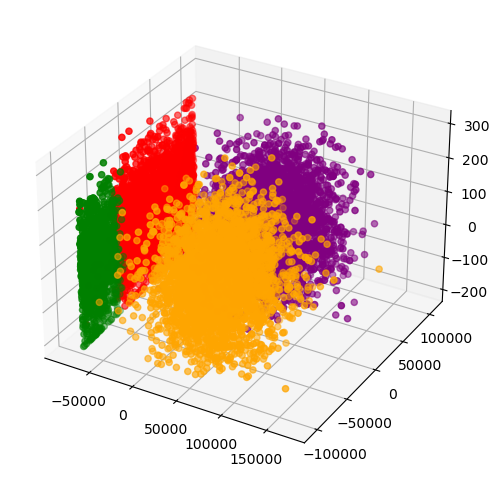

In [ ]:
visualize_3d(dataset, gmm_labels_standard)

# FEATURE IMPORTANCE

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

def feature_importance_xgboost(dataset_for_xgboost):

    # Assuming your model is already defined and trained, and your dataset is ready
    model = XGBRegressor()
    model.fit(dataset_for_xgboost.drop(columns=['Exited']), dataset_for_xgboost['Exited'])

    # Get feature importances
    importance = model.feature_importances_

    # Get feature names from dataset columns
    feature_names = dataset_for_xgboost.drop(columns=['Exited']).columns

    # Summarize feature importance
    for i, (feature, importance_score) in enumerate(zip(feature_names, importance)):
        print('Feature: {}, Score: {:.5f}'.format(feature, importance_score))

    # Plot feature importance
    plt.figure(figsize=(6, 6))
    plt.bar(feature_names, importance)
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()

    # Filter the dataset columns based on feature importance score
    important_features = [feature for feature, score in zip(feature_names, importance) if score > 0.1]

    print("Important Features:", important_features)

    return important_features

Feature: CreditScore, Score: 0.02836
Feature: Geography, Score: 0.06883
Feature: Gender, Score: 0.04642
Feature: Age, Score: 0.13127
Feature: Tenure, Score: 0.03095
Feature: Balance, Score: 0.05277
Feature: NumOfProducts, Score: 0.26559
Feature: HasCrCard, Score: 0.03487
Feature: IsActiveMember, Score: 0.30143
Feature: EstimatedSalary, Score: 0.03949


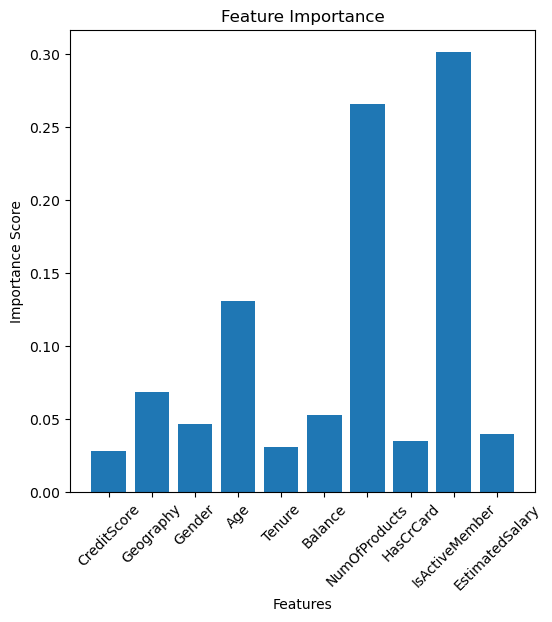

Important Features: ['Age', 'NumOfProducts', 'IsActiveMember']


['Age', 'NumOfProducts', 'IsActiveMember']

In [ ]:
feature_importance_xgboost(dataset)

In [ ]:
dataset_with_important_only = dataset.copy()
dataset_with_important_only.drop(columns=["CreditScore", "Geography", "Gender", "Tenure", "Balance", "HasCrCard", "EstimatedSalary"], inplace=True)

NameError: name 'dataset' is not defined

In [ ]:
dataset_with_important_only

,Age,NumOfProducts,IsActiveMember,Exited
0,2,1,1.0,1
1,2,1,1.0,0
2,2,3,0.0,1
3,1,2,0.0,0
5,2,2,0.0,1
...,...,...,...,...
9997,1,1,1.0,1
9998,2,2,0.0,1
9999,2,2,0.0,1
10000,0,1,0.0,0


In [ ]:
labels = perform_kmeans_clustering(dataset_with_important_only)

[0 1 2 3]
[4043 1640  526 3789]


In [ ]:
calculate_clustering_metrics("KMeans only important features", labels, dataset_with_important_only)

KMeans only important features


Silhouette score:  0.35817087243045004
Davies-Bouldin:  1.1621192338018342
